In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.utils import to_categorical
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.layers.core import Flatten
import pandas as pd
import tensorflow as tf
import cv2
import os

In [2]:
data_train = '/kaggle/input/moneytrain'
data_test = '/kaggle/input/moneytest'
image_train = []
image_test = []

for file_name in os.listdir(data_train):
  img = cv2.imread(os.path.join(data_train, file_name))
  image_train.append(cv2.resize(img, (150, 150), interpolation = cv2.INTER_AREA))
for file_name in os.listdir(data_test):
  img = cv2.imread(os.path.join(data_test, file_name))
  image_test.append(cv2.resize(img, (150, 150), interpolation = cv2.INTER_AREA))

In [3]:
image_train = np.array(image_train)
print(image_train.shape)
image_test = np.array(image_test)
print(image_test.shape)
X_train = image_train
X_test = image_test
X = X_test

(33, 150, 150, 3)
(22, 150, 150, 3)


In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ytraintest/y_test.csv
/kaggle/input/ytraintest/y_train.csv
/kaggle/input/moneytrain/200_1.jpg
/kaggle/input/moneytrain/200000_1.jpg
/kaggle/input/moneytrain/500_2.jpg
/kaggle/input/moneytrain/1000_1.jpeg
/kaggle/input/moneytrain/1000_2.jpg
/kaggle/input/moneytrain/10000_1.jpg
/kaggle/input/moneytrain/10000_2.jpg
/kaggle/input/moneytrain/100000_1.jpg
/kaggle/input/moneytrain/50000_1.jpg
/kaggle/input/moneytrain/2000_3.jpg
/kaggle/input/moneytrain/5000_2.jpg
/kaggle/input/moneytrain/200000_2.jpg
/kaggle/input/moneytrain/50000_2.png
/kaggle/input/moneytrain/100000_2.jpg
/kaggle/input/moneytrain/2000_2.jpg
/kaggle/input/moneytrain/1000_3.jpg
/kaggle/input/moneytrain/20000_1.jpg
/kaggle/input/moneytrain/50000_3.jpg
/kaggle/input/moneytrain/500_3.jpg
/kaggle/input/moneytrain/500000_1.jpg
/kaggle/input/moneytrain/2000_1.jpg
/kaggle/input/moneytrain/10000_3.jpg
/kaggle/input/moneytrain/500000_2.jpg
/kaggle/input/moneytrain/200_2.jpg
/kaggle/input/moneytrain/500_1.jpg
/kaggle/inpu

In [5]:
y_train = pd.read_csv('/kaggle/input/ytraintest/y_train.csv')
y_test = pd.read_csv('/kaggle/input/ytraintest/y_test.csv')
print(y_train.shape)
print(y_test.shape)

(33, 1)
(22, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

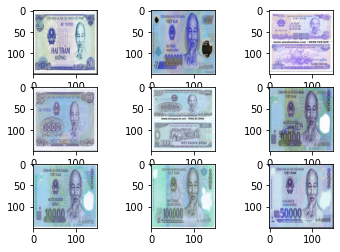

In [6]:
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(X_train[i])
plt.show

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train, 11)
y_test = to_categorical(y_test, 11)

In [8]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33, 150, 150, 3)
(22, 150, 150, 3)
(33, 11)
(22, 11)


In [10]:
model = Sequential([
    layers.RandomFlip(("horizontal"), input_shape = (150, 150, 3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.5),
])
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same', input_shape = (150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding= 'same', input_shape = (150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(11, activation = 'softmax'))

2022-05-18 02:54:20.162110: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 02:54:20.274156: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 02:54:20.275035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 02:54:20.276287: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [11]:
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
history = model.fit(X_train, y_train, epochs = 40, batch_size=64, validation_data=(X_test, y_test), verbose= 1)

2022-05-18 02:54:23.152312: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40


2022-05-18 02:54:24.868436: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1/1 [==============================] - 8s 8s/step - loss: 3.5082 - accuracy: 0.0909 - val_loss: 3.7117 - val_accuracy: 0.0455
Epoch 2/40
1/1 [==============================] - 0s 60ms/step - loss: 3.5629 - accuracy: 0.0909 - val_loss: 2.8871 - val_accuracy: 0.0909
Epoch 3/40
1/1 [==============================] - 0s 63ms/step - loss: 2.8381 - accuracy: 0.0909 - val_loss: 2.6245 - val_accuracy: 0.0909
Epoch 4/40
1/1 [==============================] - 0s 62ms/step - loss: 2.6515 - accuracy: 0.0909 - val_loss: 2.4681 - val_accuracy: 0.0909
Epoch 5/40
1/1 [==============================] - 0s 63ms/step - loss: 2.4643 - accuracy: 0.0909 - val_loss: 2.4286 - val_accuracy: 0.0909
Epoch 6/40
1/1 [==============================] - 0s 64ms/step - loss: 2.4251 - accuracy: 0.0909 - val_loss: 2.4122 - val_accuracy: 0.0909
Epoch 7/40
1/1 [==============================] - 0s 62ms/step - loss: 2.4103 - accuracy: 0.0909 - val_loss: 2.4050 - val_accuracy: 0.0909
Epoch 8/40
1/1 [========================

In [13]:
score = model.evaluate(X_test, y_test, verbose = 1)

1/1 [==============================] - 0s 23ms/step - loss: 2.4528 - accuracy: 0.0455


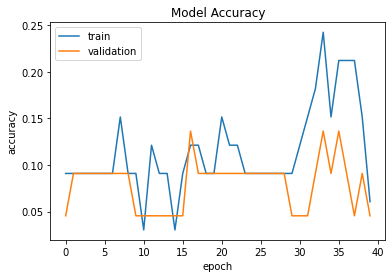

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')

In [15]:
y_pred = model.predict(X_test)

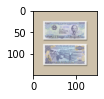

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


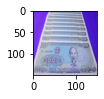

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


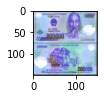

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


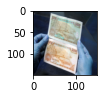

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


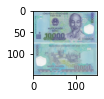

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


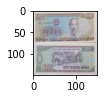

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


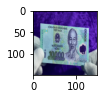

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


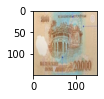

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


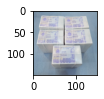

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
for i in range(9):
  plt.subplot(330 + i +1)
  plt.imshow(X_test[i])
  plt.show()  
  print(np.round(y_pred[i]))